![](https://wp.zillowstatic.com/streeteasy/2/SF_vs_NYC-v2-10a7b4.jpg)

 I recently moved from the east coast to the west coast of America. Living in the bay area has been a dream of mine for a very long time. Now, with the power and wealth that the city of San Francisco holds it comes with it'share of crime. So, I wanted to use data science to analyse the crime rate in the city of dreams, San Francisco. Lets get started.

In [1]:
#import the libraries we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
print(os.listdir("../input"))


['Police_Department_Incident_Reports__2018_to_Present.csv']


Load the dataset using pandas.

In [2]:
data = pd.read_csv('../input/Police_Department_Incident_Reports__2018_to_Present.csv')

In [3]:
data.shape

(223958, 34)

In [4]:
data.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
count,223958.000000,2.239580e+05,223958.000000,2.239580e+05,1.729940e+05,223958.000000,2.109300e+05,210930.000000,210930.000000,210930.000000,206478.000000,210587.000000,210896.000000,210840.000000,50478.000000,11391.000000,30161.0,2797.000000
mean,2018.309804,7.194300e+10,719429.711982,1.846084e+08,1.848843e+08,25546.650774,2.532762e+07,5.961736,37.769763,-122.423156,52.552514,4.867827,6.646598,21.010842,2.358513,35.441489,1.0,24.488023
std,0.462414,5.693458e+09,56934.576140,6.115305e+06,1.087643e+07,25998.485391,3.088000e+06,2.762939,0.023910,0.025763,32.418098,2.715032,3.367490,12.572043,1.371017,12.633153,0.0,5.626324
min,2018.000000,6.186871e+10,618687.000000,1.131000e+06,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000
25%,2018.000000,6.704433e+10,670443.250000,1.804538e+08,1.813817e+08,6244.000000,2.399100e+07,3.000000,37.757020,-122.433179,23.000000,3.000000,3.000000,8.000000,1.000000,35.000000,1.0,23.000000
50%,2018.000000,7.194592e+10,719458.500000,1.809077e+08,1.826909e+08,9016.000000,2.490400e+07,6.000000,37.776231,-122.417146,44.000000,5.000000,7.000000,20.000000,3.000000,35.000000,1.0,24.000000
75%,2019.000000,7.686758e+10,768675.750000,1.901157e+08,1.904210e+08,62040.000000,2.635300e+07,8.000000,37.785893,-122.407001,85.000000,6.000000,10.000000,34.000000,3.000000,35.000000,1.0,24.000000
max,2019.000000,8.178801e+10,817880.000000,9.811720e+08,1.000000e+09,75030.000000,5.400400e+07,11.000000,37.829991,-122.363743,117.000000,10.000000,11.000000,41.000000,5.000000,80.000000,1.0,31.000000


In [5]:
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites)
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,II,Initial,NaN,64070,Suspicious Occ,Suspicious Occ,Suspicious Occurrence,Unfounded,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,II,Initial,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,FRANKLIN ST \ EDDY ST,25191000.0,Northern,Western Addition,5.0,37.782685,-122.422464,"(37.78268536745206, -122.42246374465972)",100.0,4.0,11.0,39.0,NaN,NaN,NaN,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,IS,Initial Supplement,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,ANZA ST \ 06TH AVE,27275000.0,Richmond,Inner Richmond,1.0,37.779091,-122.464145,"(37.779090726308574, -122.46414497098554)",5.0,8.0,4.0,11.0,NaN,NaN,NaN,NaN


In [6]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Since the geoJSON has the District values in upper case we convert to uppercase as well.

In [7]:
data['Police_District'] = data['Police_District'].str.upper() 

Now, since I know the structure and the various features of the data, I can easily generate plots for it.

In [8]:
data.isnull().sum()
# there are a lot of null values in the data

Incident_Datetime                                            0
Incident_Date                                                0
Incident_Time                                                0
Incident_Year                                                0
Incident_Day_of_Week                                         0
Report_Datetime                                              0
Row_ID                                                       0
Incident_ID                                                  0
Incident_Number                                              0
CAD_Number                                               50964
Report_Type_Code                                             0
Report_Type_Description                                      0
Filed_Online                                            176347
Incident_Code                                                0
Incident_Category                                           19
Incident_Subcategory                                   

Let's clean the data and give a value'NaN' for the empty entries.

In [9]:
new_df = data.fillna({
    'CAD_Number' : 'NaN',
    'Filed_Online' : 'NaN',
    'Incident_Subcategory' : 'NaN',
    'Incident_Category' : 'NaN',
    'CNN' : 'NaN',
    'Intersection' : 'NaN',
    'Analysis_Neighborhood' : 'NaN',
    'Supervisor_District' : 'NaN',
    'Latitude' : 'NaN',
    'Longitude' : 'NaN',
    'point' : 'NaN',
    'SF_Find_Neighborhoods' : 'NaN',
    'Current_Police_Districts' : 'NaN',
    'Current_Supervisor_Districts' : 'NaN',
    'Analysis_Neighborhoods' : 'NaN',
    'HSOC_Zones_as_of_2018-06-05' : 'NaN',
    'OWED_Public_Spaces' : 'NaN',
    'Central_Market/Tenderloin_Boundary_Polygon_-_Updated' : 'NaN',
    'Parks_Alliance_CPSI_27+TL_sites' : 'NaN',
})

In [10]:
#Check
new_df.isnull().sum()

Incident_Datetime                                       0
Incident_Date                                           0
Incident_Time                                           0
Incident_Year                                           0
Incident_Day_of_Week                                    0
Report_Datetime                                         0
Row_ID                                                  0
Incident_ID                                             0
Incident_Number                                         0
CAD_Number                                              0
Report_Type_Code                                        0
Report_Type_Description                                 0
Filed_Online                                            0
Incident_Code                                           0
Incident_Category                                       0
Incident_Subcategory                                    0
Incident_Description                                    0
Resolution    

Let's make a word cloud to see the most frequently occuring crimes.

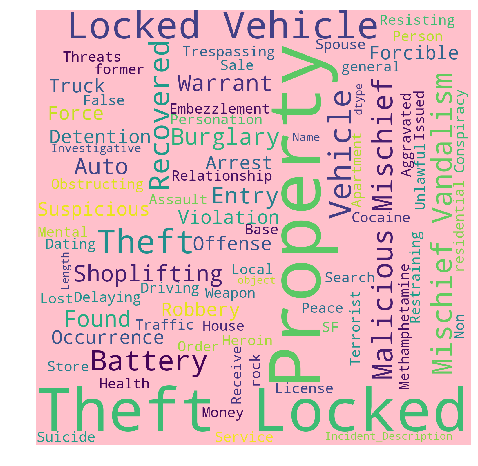

In [11]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('bmh')
wc = WordCloud(background_color = 'pink', width = 1500, height = 1500).generate(str(data['Incident_Description']))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Visualizations

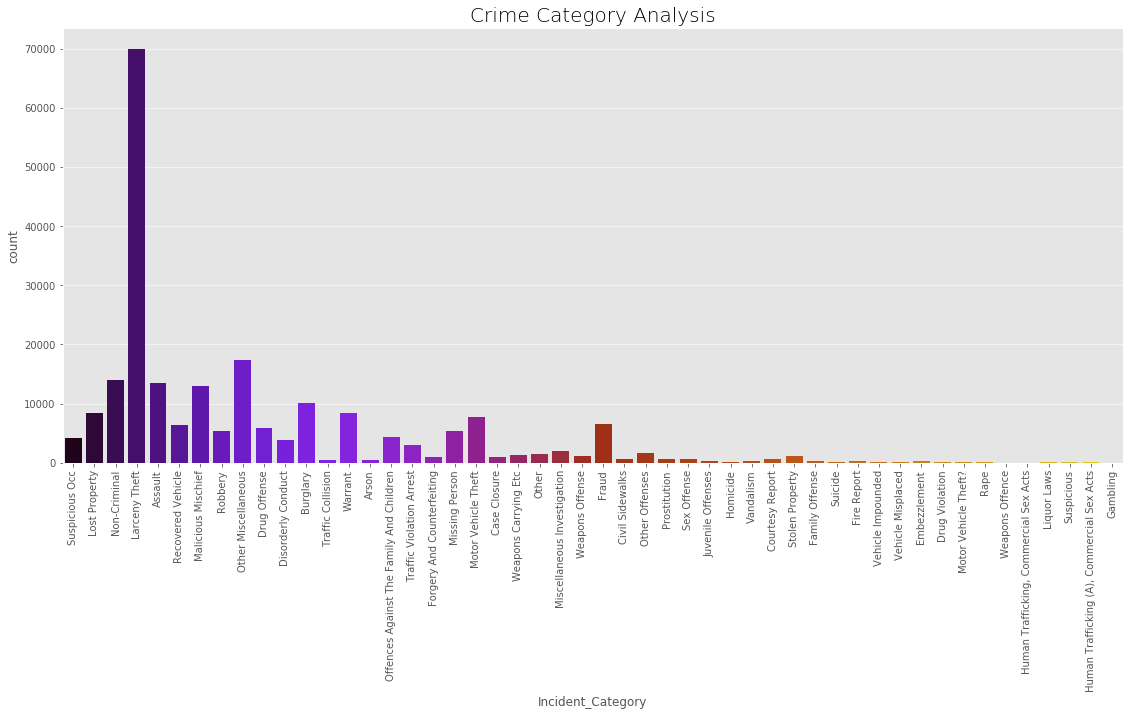

In [12]:
plt.rcParams['figure.figsize'] = (19, 8)
plt.style.use('ggplot')

sns.countplot(data['Incident_Category'], palette = 'gnuplot')
plt.title('Crime Category Analysis', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

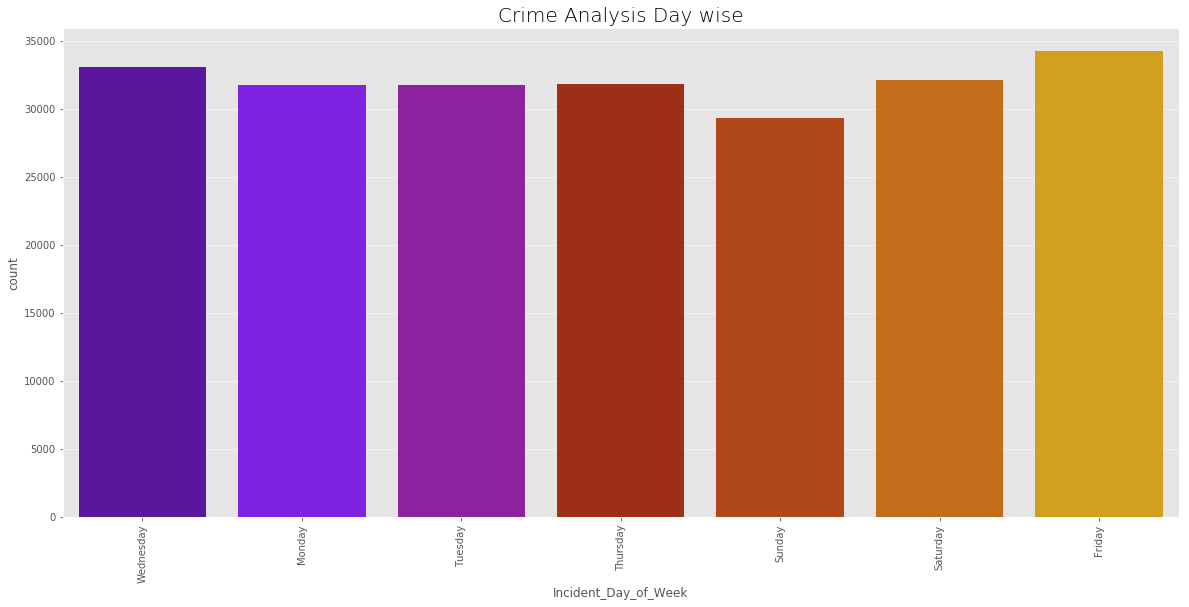

In [13]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn-bright')
sns.countplot(data['Incident_Day_of_Week'], palette = 'gnuplot')
plt.title('Crime Analysis Day wise', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

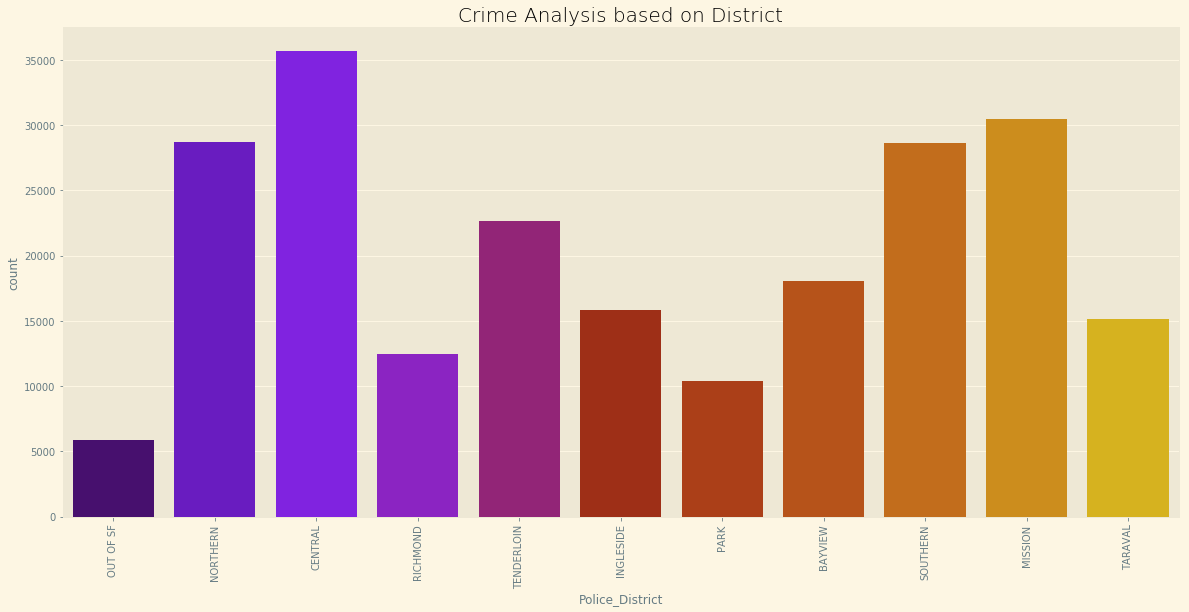

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')
sns.countplot(data['Police_District'], palette = 'gnuplot')
plt.title('Crime Analysis based on District', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

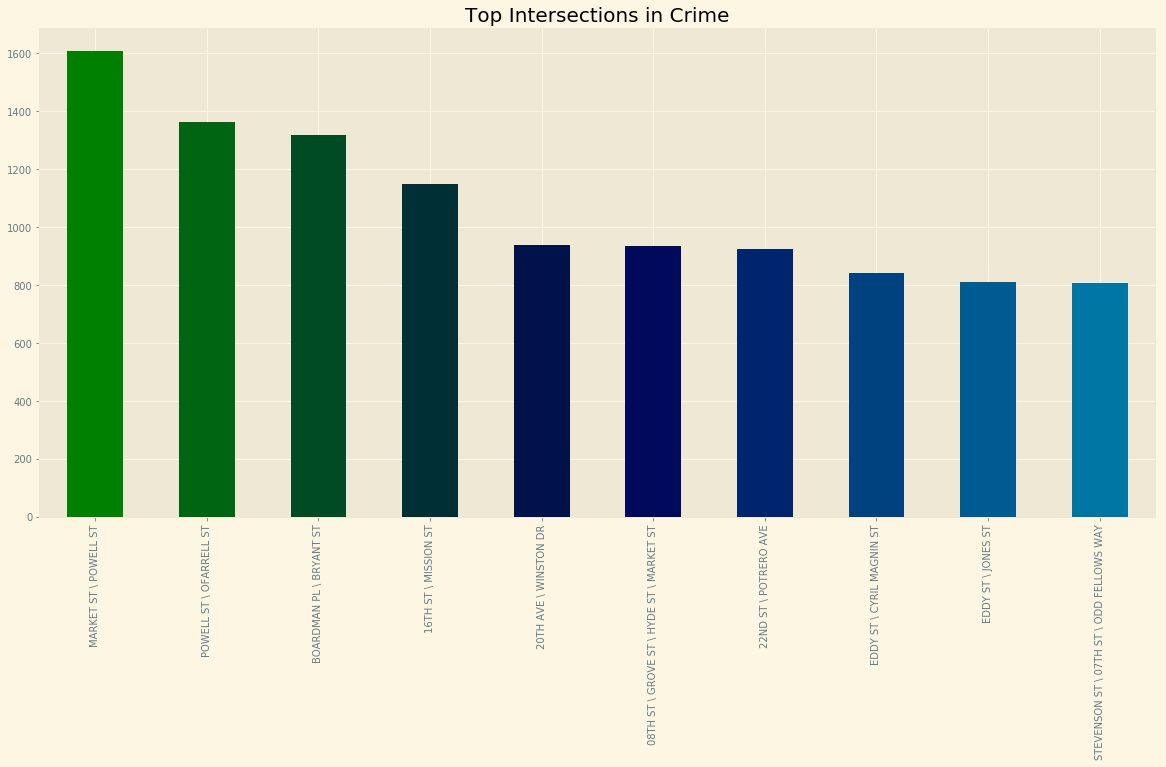

In [15]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['Intersection'].value_counts().head(10).plot.bar(color = color)

plt.title('Top Intersections in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

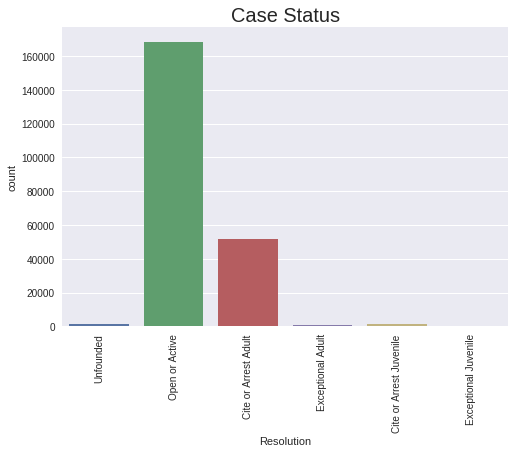

In [16]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')
sns.countplot(data['Resolution'])
plt.title('Case Status', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

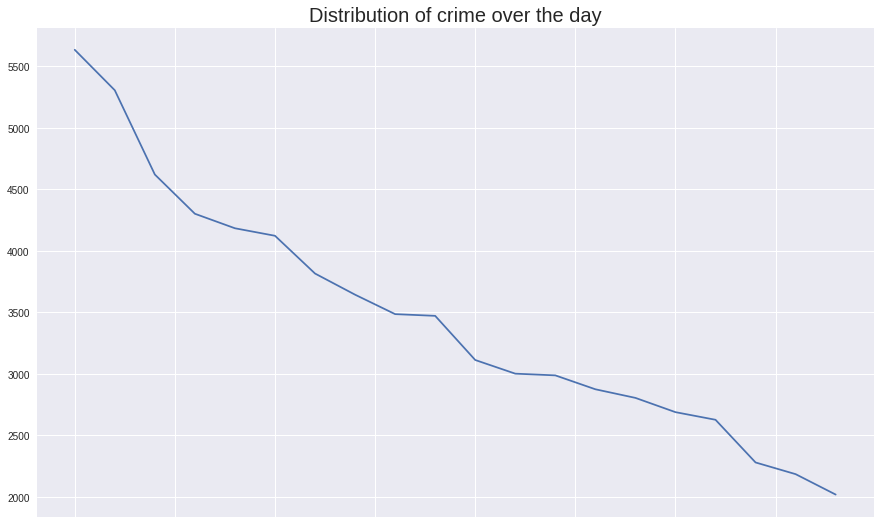

In [17]:
import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Incident_Time'].value_counts().head(20).plot.line(figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

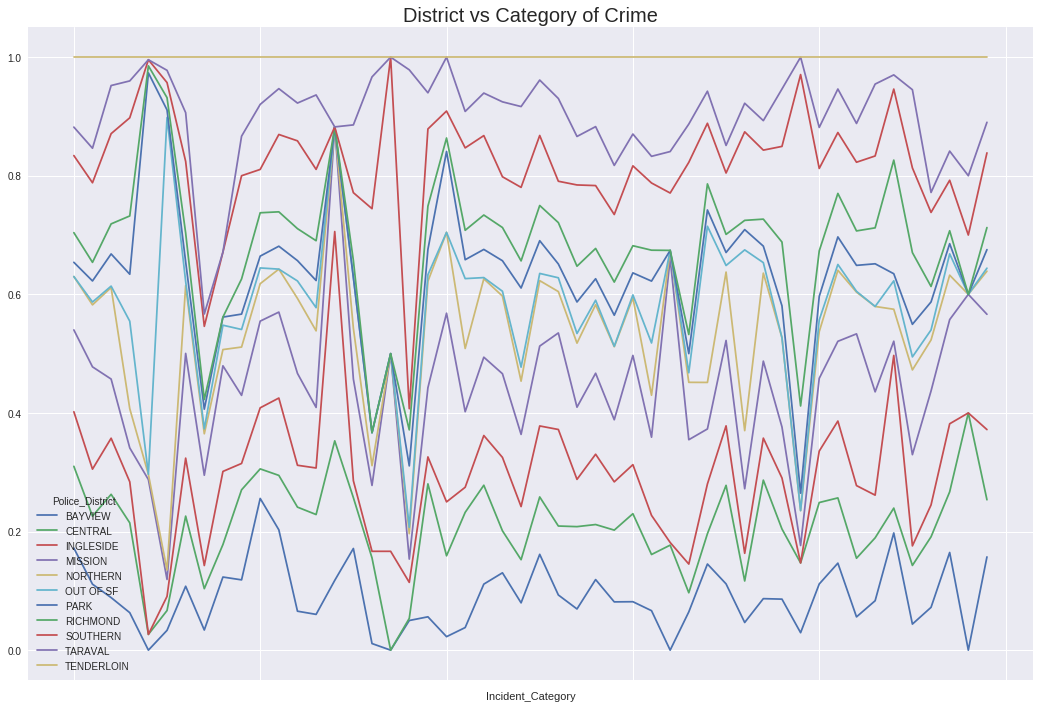

In [18]:
#line graph
df = pd.crosstab(data['Incident_Category'], data['Police_District'])
color = plt.cm.Greys(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis = 0).plot.line(stacked = True,figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

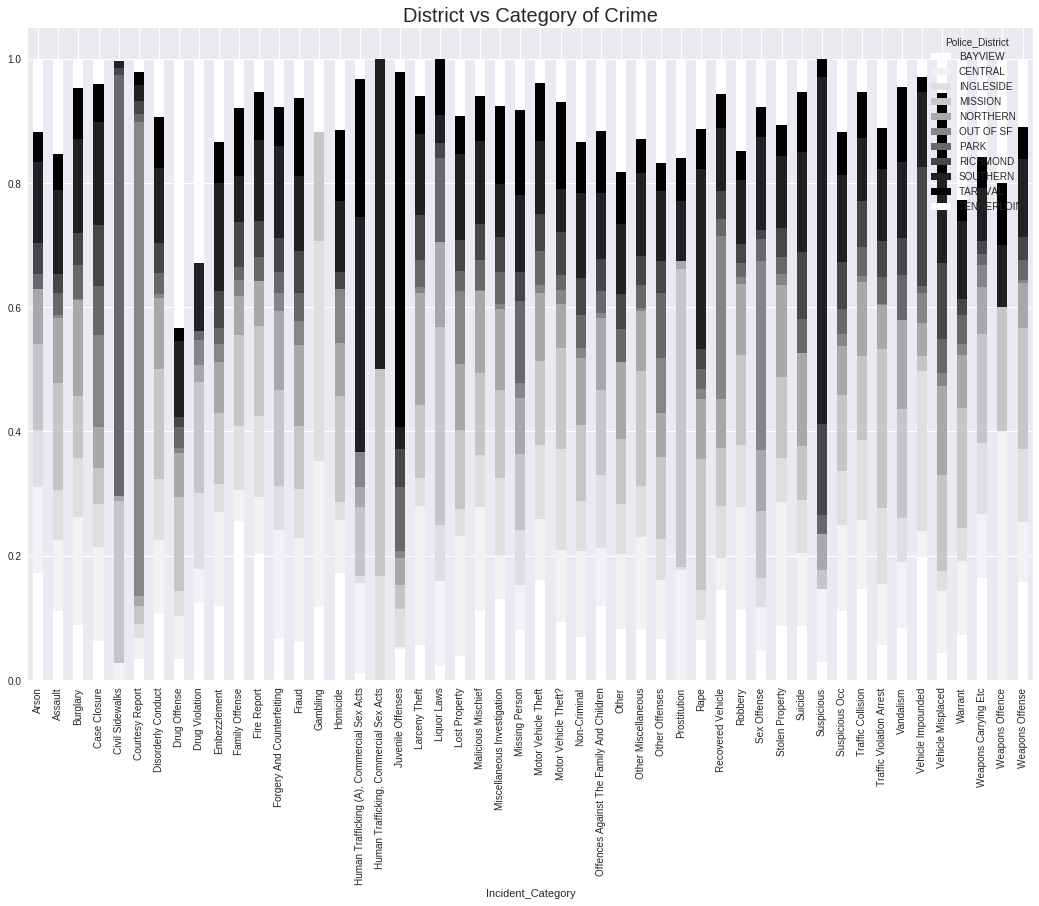

In [19]:
#bar graph
df = pd.crosstab(data['Incident_Category'], data['Police_District'])
color = plt.cm.Greys(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis = 0).plot.bar(color=color, stacked = True,figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [20]:
t = new_df.Police_District.value_counts()

In [21]:
t

CENTRAL       35705
MISSION       30464
NORTHERN      28733
SOUTHERN      28647
TENDERLOIN    22657
BAYVIEW       18055
INGLESIDE     15837
TARAVAL       15139
RICHMOND      12457
PARK          10379
OUT OF SF      5885
Name: Police_District, dtype: int64

In [22]:
#Creatiing a data frame to get the geospatial distribution based on district
t = data.Police_District.value_counts()
dist= pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
dist.reindex(["Central", "Northern", "Park", "Southern", "Mission", "Tenderloin", "Richmond", "Taraval", "Ingleside", "Bayview"])
dist = dist.reset_index()
dist.rename({'index': 'District'}, axis='columns', inplace=True)
dist[:-1]


,District,Count
0,CENTRAL,35705
1,MISSION,30464
2,NORTHERN,28733
3,SOUTHERN,28647
4,TENDERLOIN,22657
5,BAYVIEW,18055
6,INGLESIDE,15837
7,TARAVAL,15139
8,RICHMOND,12457
9,PARK,10379


### THE MAIN MAP : Precinct Map

In [23]:
import folium
 
gjson = r'https://cocl.us/sanfran_geojson'
SFmap = folium.Map(location = [37.77, -122.42], zoom_start = 12)
#making a chloropleth map, one can also use plotly, d3js etc.
SFmap.choropleth(
    geo_data=gjson,
    data=dist,
    columns=['District', 'Count'],
    key_on='feature.properties.DISTRICT',
    line_opacity=0.3,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    legend_name='Crime Rate in San Francisco'
)
SFmap

Here we are with the geospatial distribution of crime in San Francisco. The heat map for New York City can be found at https://maps.nyc.gov/crime/. Hope you all enjoyed this kernel. 

Leave comments on how this could be improved. Have fun!!